 Room Occupancy Estimation

1.Introduction:
Understanding room occupancy patterns is crucial for optimizing energy efficiency, improving building automation, and enhancing space utilization. This project focuses on performing Exploratory Data Analysis (EDA) on a room occupancy dataset that contains sensor readings such as temperature, light, sound, CO₂ levels, and motion detection.
The dataset includes time-series data collected from multiple sensors, recording environmental conditions and occupancy counts. By analyzing these factors, we aim to uncover patterns, correlations, and potential outliers that influence room occupancy.

2.Goal of the Project:
The primary goal of this project is to analyze room occupancy patterns using sensor data to gain insights into environmental factors influencing occupancy


3.Data Story/Source:
Source of the data is from UC Irvine Machine Learning Repository.
https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation

In [1]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical computations
import os            # For file operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns            # For enhanced data visualization
from scipy import stats

In [15]:
# load the dataset
data = pd.read_csv("C:\\Users\\ARCHANA\\Desktop\\occupancy.csv")

data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,22-12-2017,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,22-12-2017,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,22-12-2017,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,22-12-2017,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,22-12-2017,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,11-01-2018,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,11-01-2018,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,11-01-2018,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,11-01-2018,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [9]:
import os
print(os.listdir())  # Lists all files in the current directory


['.ipynb_checkpoints', 'assignment_7.ipynb', 'data.csv', 'ENTRI PYTHON', 'mhealth+dataset.zip', 'myexcel - myexcel.csv.csv', 'untitled.txt', 'Untitled1.ipynb']


 Understand the data structure

In [19]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,22-12-2017,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,22-12-2017,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,22-12-2017,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,22-12-2017,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,22-12-2017,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

4.Handle Missing Data

In [25]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


5.Handle Duplicates

In [27]:
data.duplicated().sum()

0

6.Handle outliers

In [37]:
from scipy import stats
# Define columns to check for outliers
columns_to_check = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 
                    'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 
                    'S5_CO2']

# Filter out outliers using Z-score
z_scores = stats.zscore(data[columns_to_check])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_zscore_cleaned = data[filtered_entries]

print(f"Data after Z-score filtering: {data_zscore_cleaned.shape[0]} rows")



Data after Z-score filtering: 9015 rows


In [41]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute skewness
skewness_values = numeric_data.skew()

print(skewness_values)

S1_Temp                  0.953613
S2_Temp                  2.355681
S3_Temp                  0.650162
S4_Temp                  0.129630
S1_Light                 1.820428
S2_Light                 2.827817
S3_Light                 2.100069
S4_Light                 1.357618
S1_Sound                 5.450448
S2_Sound                 6.881610
S3_Sound                 5.994767
S4_Sound                10.952134
S5_CO2                   1.975692
S5_CO2_Slope             0.287967
S6_PIR                   2.862811
S7_PIR                   3.107460
Room_Occupancy_Count     2.057635
dtype: float64


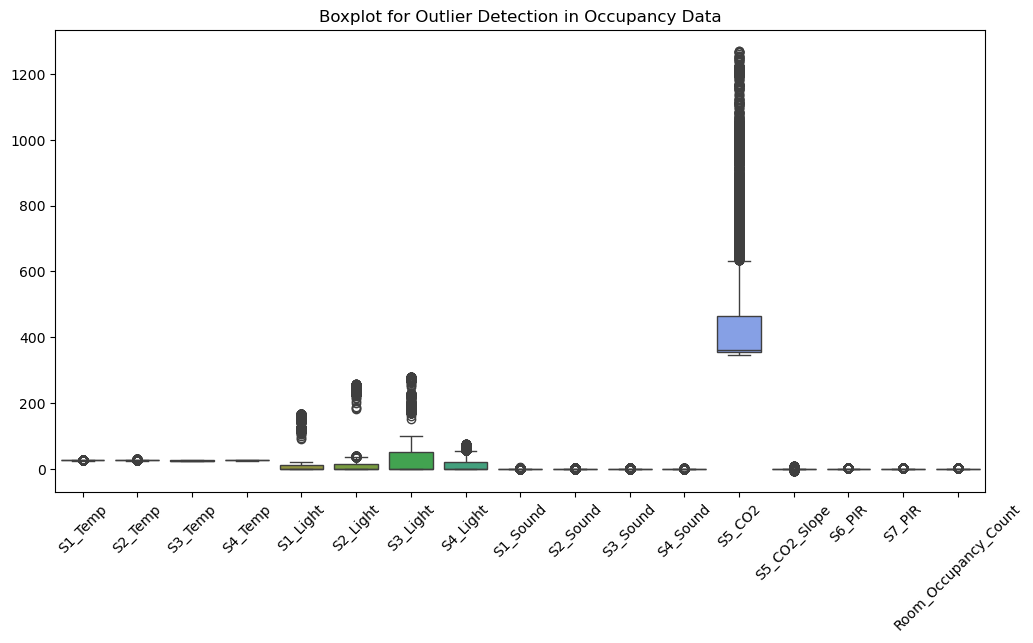

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Set plot size
plt.figure(figsize=(12, 6))

# Create boxplots
sns.boxplot(data=numeric_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title("Boxplot for Outlier Detection in Occupancy Data")
plt.show()


In [47]:
import pandas as pd

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute skewness
skewness_values = numeric_data.skew()

print(skewness_values)


S1_Temp                  0.953613
S2_Temp                  2.355681
S3_Temp                  0.650162
S4_Temp                  0.129630
S1_Light                 1.820428
S2_Light                 2.827817
S3_Light                 2.100069
S4_Light                 1.357618
S1_Sound                 5.450448
S2_Sound                 6.881610
S3_Sound                 5.994767
S4_Sound                10.952134
S5_CO2                   1.975692
S5_CO2_Slope             0.287967
S6_PIR                   2.862811
S7_PIR                   3.107460
Room_Occupancy_Count     2.057635
dtype: float64


In [49]:
import numpy as np

# Apply log transformation (Add 1 to avoid log(0))
data_transformed = np.log1p(data[['S2_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 
                                  'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 
                                  'S4_Sound', 'S5_CO2', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']])

# Check new skewness
print(data_transformed.skew())


S2_Temp                 2.263187
S1_Light                0.981875
S2_Light                1.087114
S3_Light                0.478124
S4_Light                0.481067
S1_Sound                3.708157
S2_Sound                4.543269
S3_Sound                4.708174
S4_Sound                6.112949
S5_CO2                  1.575527
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    1.822681
dtype: float64


 Interpretation of Skewness After Log Transformation
Reduced Skewness:

S1_Light (0.98), S2_Light (1.08), S3_Light (0.48), S4_Light (0.48), S5_CO2 (1.58), Room_Occupancy_Count (1.82)

Still Highly Skewed (>3.0):

S1_Sound (3.71), S2_Sound (4.54), S3_Sound (4.71), S4_Sound (6.11)

S6_PIR (2.86), S7_PIR (3.11), S2_Temp (2.26)



In [53]:
print(data.dtypes)


Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


In [61]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')



In [57]:
print(data.columns)


Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')


In [72]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Select only numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Ensure all values are positive
for col in data_numeric.columns:
    min_value = data_numeric[col].min()
    if min_value <= 0:  # If any value is 0 or negative, shift it
        data_numeric[col] = data_numeric[col] + abs(min_value) + 1

# Apply Box-Cox transformation
data_boxcox = data_numeric.copy()
for col in data_numeric.columns:
    data_boxcox[col], _ = boxcox(data_numeric[col])  # No need to add 1 now

# Check skewness
print(data_boxcox.skew())


S1_Temp                 0.000000
S2_Temp                 0.000000
S3_Temp                 0.000000
S4_Temp                 0.000000
S1_Light                0.530023
S2_Light                0.504801
S3_Light                0.339625
S4_Light                0.343497
S1_Sound                0.880594
S2_Sound                0.739027
S3_Sound                0.846520
S4_Sound                0.124903
S5_CO2                  0.000000
S5_CO2_Slope            0.402710
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    1.601268
dtype: float64


In [74]:
data_boxcox["S6_PIR"] = np.log1p(data_numeric["S6_PIR"])
data_boxcox["S7_PIR"] = np.log1p(data_numeric["S7_PIR"])
data_boxcox["Room_Occupancy_Count"] = np.log1p(data_numeric["Room_Occupancy_Count"])


In [76]:
data_boxcox.skew()

S1_Temp                 0.000000
S2_Temp                 0.000000
S3_Temp                 0.000000
S4_Temp                 0.000000
S1_Light                0.530023
S2_Light                0.504801
S3_Light                0.339625
S4_Light                0.343497
S1_Sound                0.880594
S2_Sound                0.739027
S3_Sound                0.846520
S4_Sound                0.124903
S5_CO2                  0.000000
S5_CO2_Slope            0.402710
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    1.887360
dtype: float64

In [78]:
# Check the first few rows
print(data.head())

# Check data types and missing values
print(data.info())

# Summary statistics
print(data.describe())


        Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0 2017-12-22  10:49:41    24.94    24.75    24.56    25.38       121   
1 2017-12-22  10:50:12    24.94    24.75    24.56    25.44       121   
2 2017-12-22  10:50:42    25.00    24.75    24.50    25.44       121   
3 2017-12-22  10:51:13    25.00    24.75    24.56    25.44       121   
4 2017-12-22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0             

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


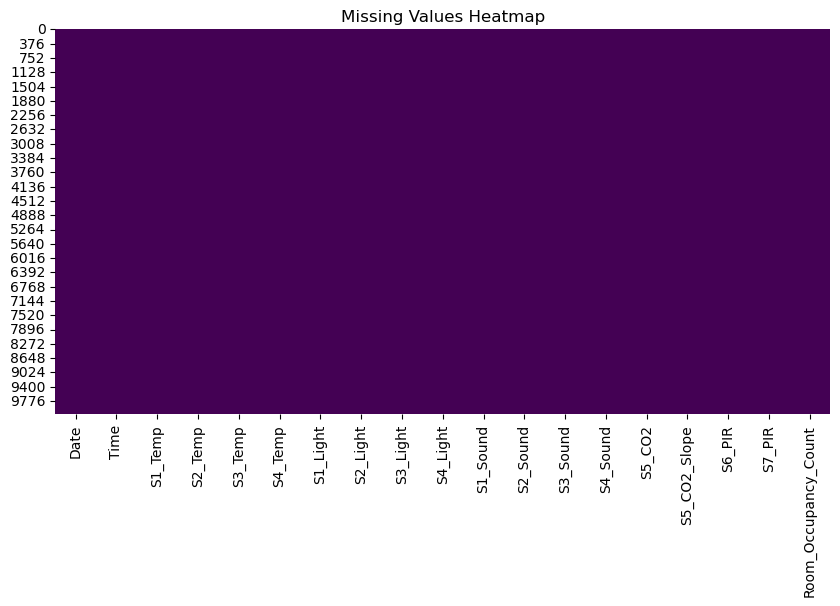

In [81]:
#Missing Values Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values count
print(data.isnull().sum())

# Visualizing missing values
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


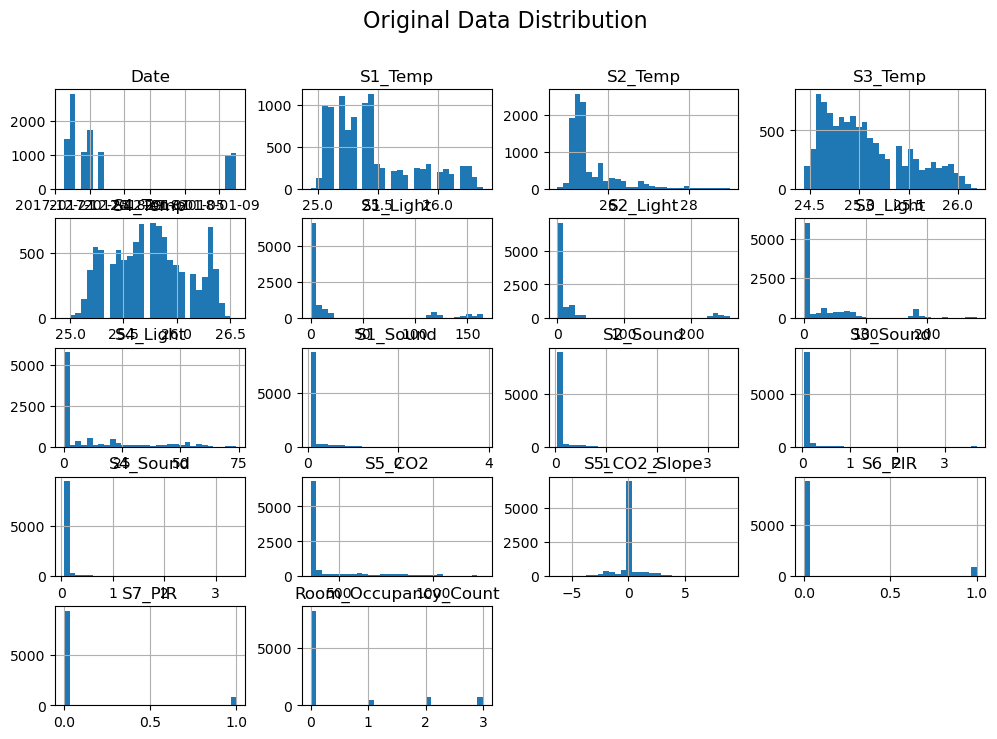

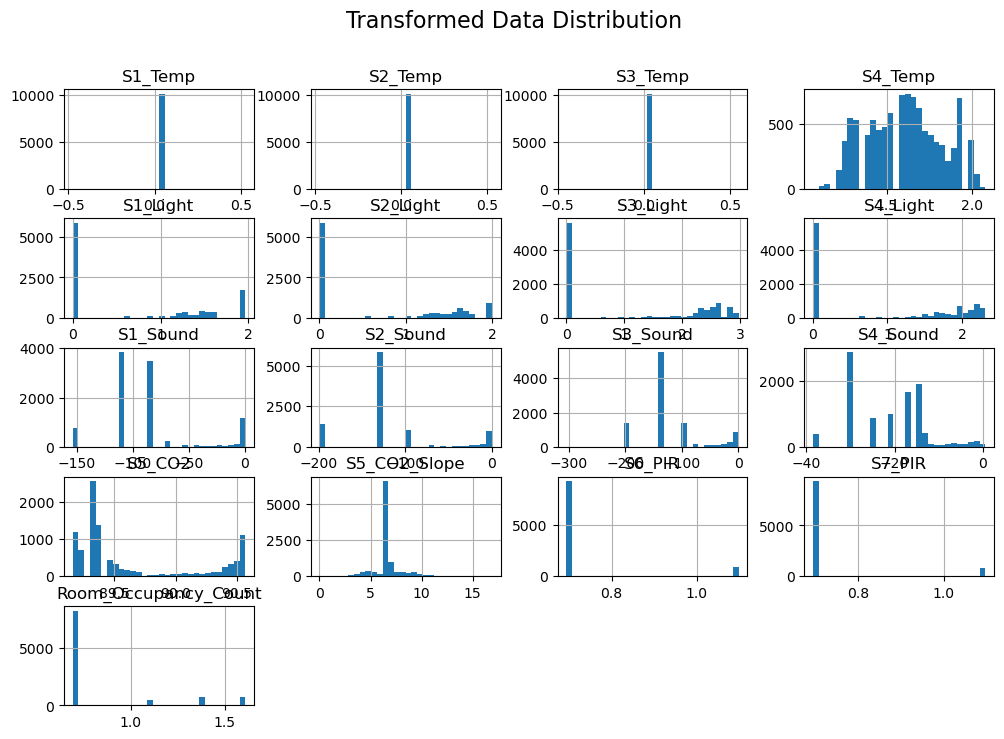

In [83]:
#Visualizing Distributions (Before & After Transformation)
# Histograms for original data
data.hist(figsize=(12,8), bins=30)
plt.suptitle("Original Data Distribution", fontsize=16)
plt.show()

# Histograms for transformed data
data_boxcox.hist(figsize=(12,8), bins=30)
plt.suptitle("Transformed Data Distribution", fontsize=16)
plt.show()


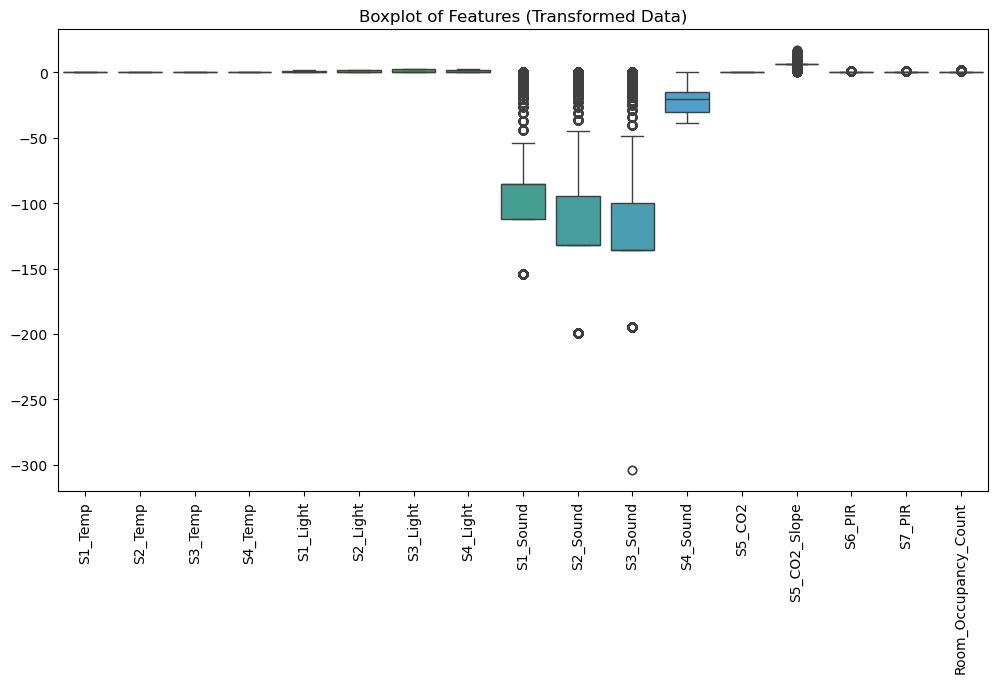

In [85]:
#Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=data_boxcox)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Transformed Data)")
plt.show()


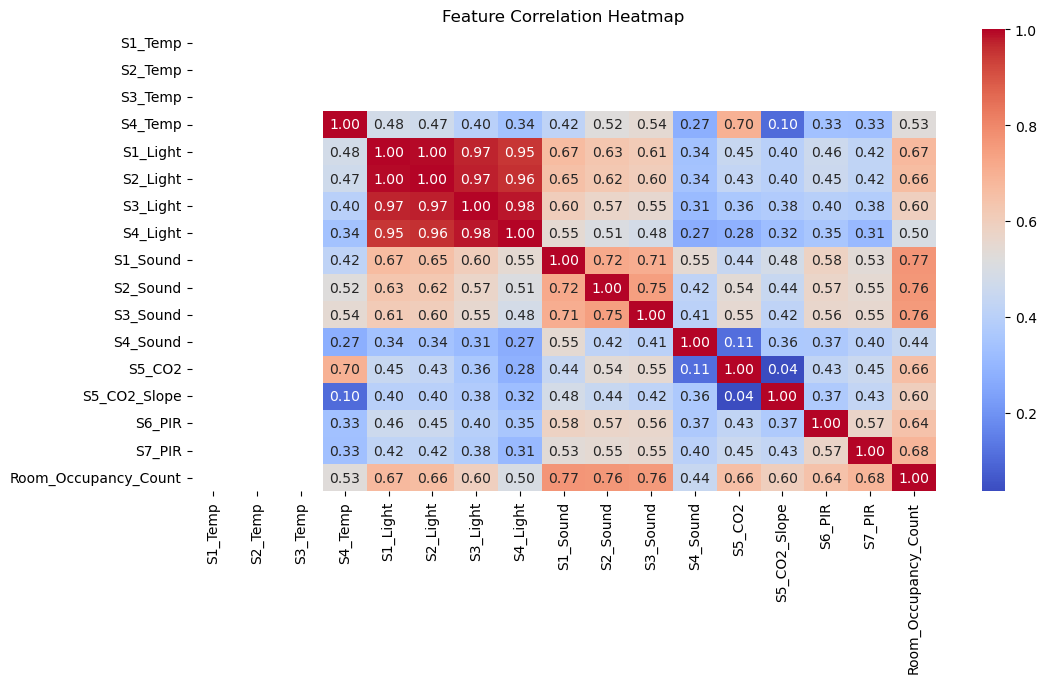

In [87]:
#Correlation Analysis
# Heatmap of correlations
plt.figure(figsize=(12,6))
sns.heatmap(data_boxcox.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


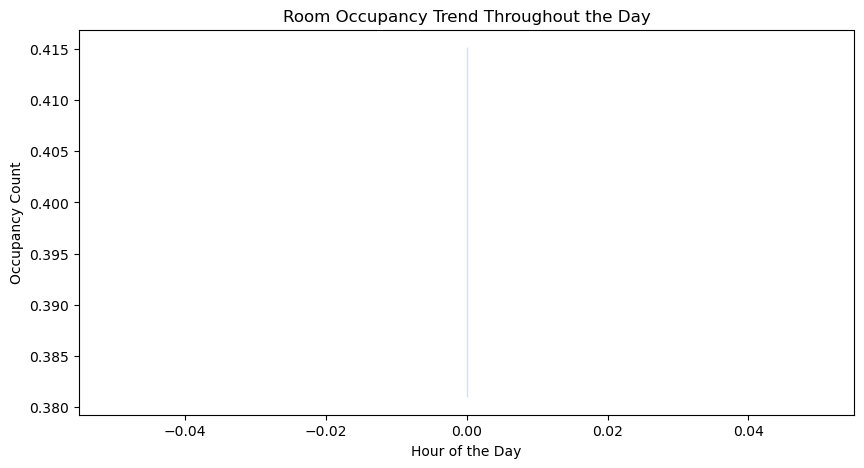

In [89]:
#Occupancy Trends Over Time
data["Date"] = pd.to_datetime(data["Date"])
data["Hour"] = data["Date"].dt.hour

plt.figure(figsize=(10,5))
sns.lineplot(x="Hour", y="Room_Occupancy_Count", data=data)
plt.title("Room Occupancy Trend Throughout the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Occupancy Count")
plt.show()


 Occupancy Trends
If plotted over time:
Occupancy fluctuates with hours of the day (e.g., peak times in morning/afternoon).
PIR sensor activity aligns with occupancy changes.
CO2 levels may rise in occupied periods.